In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(r'D:\Augustana University\Courses\5. Spring 2020\COSC 380-A Artificial Intelligence & Robotics\Projects\Final Project\Final Final\weatherAUS.csv')

In [79]:
df.shape

(145460, 24)

In [80]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


**Date**: The date of observation<br/>
**Location:** The common name of the location of the weather station<br/>
**MinTemp:** The minimum temperature in degrees celsius<br/>
**MaxTemp:** The maximum temperature in degrees celsius<br/>
**Rainfall:** The amount of rainfall recorded for the day in mm<br/>
**Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br/>
**Sunshine:** The number of hours of bright sunshine in the day.<br/>
**WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight<br/>
**WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br/>
**WindDir9am:** Direction of the wind at 9am<br/>
**WindDir3pm:** Direction of the wind at 3pm<br/>
**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am<br/>
**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br/>
**Humidity9am:** Humidity (percent) at 9am<br/>
**Humidity3pm:** Humidity (percent) at 3pm<br/>
**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am<br/>
**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br/>
**Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in oktas, which are a unit of eigths. It records how many<br/>
**Cloud3pm:** Fraction of sky obscured by cloud at 3pm. This is measured in oktas, which are a unit of eigths. It records how many<br/>
**Temp9am:** Temperature (degrees C) at 9am<br/>
**Temp3pm:** Temperature (degrees C) at 9am<br/>
**RainToday:** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br/>
**RISK_MM:** The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".<br/>
**RainTomorrow:** The target variable. Did it rain tomorrow?<br/>

In [81]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000


In [82]:
df.drop(labels = ['Date', 'Location', 'RISK_MM'], axis = 1, inplace = True)

In [83]:
# Replacing Yes by 1 and No by 0 for RainToday and RainTomorrow columns

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [84]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [85]:
df['WindGustDir'].replace({'W': 1, 'WNW': 2, 'WSW': 3, 'NE': 4, 'NNW':5, 'N':6, 'NNE': 7, 'SW': 8,
                          'ENE':9, 'SSE': 10, 'S': 11, 'NW': 12, 'SE':13, 'ESE':14,
                          'E': 15, 'SSW':16}, inplace = True)

In [86]:
#import seaborn as sns

#f, ax = plt.subplots(figsize=(20, 15))
#corr = df.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax, annot = True)

In [87]:
#sns.pairplot(df)

In [88]:
categorical = ['WindDir3pm', 'WindDir9am']

In [89]:
# Adding dummy variables for categorical predictors

df = pd.get_dummies(df, columns = categorical, drop_first = True)

In [90]:
# Getting rid of nan values

df = df.dropna(how = 'any')
df.shape

(58080, 49)

In [91]:
from sklearn import preprocessing

scale = preprocessing.MinMaxScaler()
scale.fit(df)

df = pd.DataFrame(scale.transform(df), index = df.index, columns = df.columns)

In [92]:
X = df.drop(labels = ['RainTomorrow'], axis = 1)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6049,0.645669,0.706818,0.0,0.147783,0.848276,1.000000,0.339130,0.089552,0.263158,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6050,0.658793,0.563636,0.0,0.182266,0.896552,0.666667,0.243478,0.283582,0.250000,0.30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6052,0.685039,0.761364,0.0,0.133005,0.731034,0.400000,0.321739,0.447761,0.197368,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6053,0.750656,0.779545,0.0,0.140394,0.841379,0.066667,0.191304,0.089552,0.078947,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6054,0.811024,0.838636,0.0,0.137931,0.579310,0.066667,0.226087,0.253731,0.171053,0.19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,0.682415,0.665909,0.0,0.073892,0.758621,0.533333,0.226087,0.134328,0.263158,0.63,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142299,0.732283,0.647727,0.0,0.093596,0.593103,0.933333,0.243478,0.194030,0.144737,0.56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142300,0.719160,0.652273,0.0,0.068966,0.758621,0.933333,0.208696,0.253731,0.144737,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142301,0.687664,0.629545,0.0,0.076355,0.731034,0.866667,0.147826,0.134328,0.223684,0.62,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
y = df['RainTomorrow']
y

6049      0.0
6050      0.0
6052      0.0
6053      0.0
6054      0.0
         ... 
142298    0.0
142299    0.0
142300    0.0
142301    0.0
142302    0.0
Name: RainTomorrow, Length: 58080, dtype: float64

In [94]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [95]:
X_train.shape

(37171, 48)

In [96]:
X_val.shape

(9293, 48)

In [97]:
X_test.shape

(11616, 48)

In [98]:
# Dimension Reduction to keep 95% of the variance. Reducing 16 variables!

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)

X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [99]:
X_train.shape

(37171, 33)

In [100]:
X_val.shape

(9293, 33)

In [101]:
X_test.shape

(11616, 33)

# Models

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
X_train_pred = model_lr.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[27180,  1790],
       [ 4519,  3682]], dtype=int64)

In [67]:
accuracy_lr_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_lr_train)

accuracy on training set:  0.8302709101181028


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
hyperparameters = dict(C=C, penalty=penalty)

best_model_lr = RandomizedSearchCV(model_lr, hyperparameters, random_state=42, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_model_lr.fit(X_val, y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
best_model_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [73]:
X_val_pred = best_model_lr.predict(X_val)
confusion_matrix(y_val, X_val_pred)

array([[6909,  428],
       [1099,  857]], dtype=int64)

In [74]:
accuracy_lr_val = accuracy_score(y_val, X_val_pred)
print("best model's accuracy on validation set: ", accuracy_lr_val)

best model's accuracy on validation set:  0.8356827719789088


In [75]:
X_test_pred = best_model_lr.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8508,  539],
       [1414, 1155]], dtype=int64)

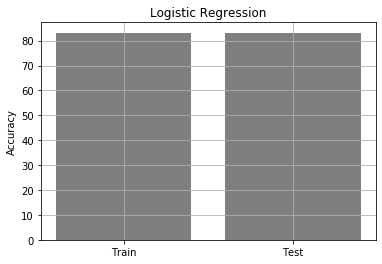

In [34]:
import matplotlib.pyplot as plt

models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_lr_train*100, accuracy_lr_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.grid(True)

plt.show()

## Support Vector Machine

In [35]:
from sklearn import svm

model_svm = clf_svc = svm.SVC()
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
X_train_pred = model_svm.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[27902,  1068],
       [ 4570,  3631]], dtype=int64)

In [37]:
accuracy_svm_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_svm_train)

accuracy on training set:  0.848322617093971


In [38]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
best_model_svm = GridSearchCV(model_svm, param_grid, verbose = 3) 

best_model_svm.fit(X_val, y_val)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.792, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.791, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.791, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.791, total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.808, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.820, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.811, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.817, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [39]:
best_model_svm.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [40]:
X_val_pred = best_model_svm.predict(X_val)
confusion_matrix(y_val, X_val_pred)

array([[7050,  287],
       [1039,  917]], dtype=int64)

In [41]:
accuracy_svm_val = accuracy_score(y_val, X_val_pred)
print("best model's accuracy on validation set: ", accuracy_svm_val)

best model's accuracy on validation set:  0.8573119552351232


In [42]:
X_test_pred = best_model_svm.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8618,  429],
       [1450, 1119]], dtype=int64)

In [43]:
accuracy_svm_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_svm_test)

accuracy on test set:  0.8382403581267218


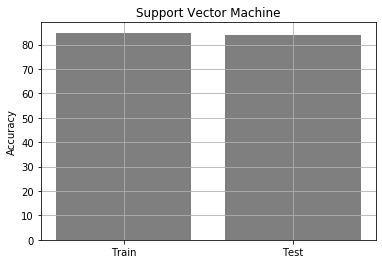

In [44]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_svm_train*100, accuracy_svm_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Support Vector Machine')
plt.grid(True)

plt.show()

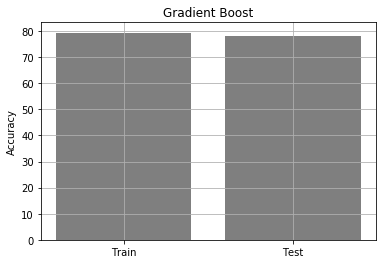

In [105]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [79.4, 78.2]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Gradient Boost')
plt.grid(True)

plt.show()

## Gradient Boost Classifier

In [45]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
X_train_pred = model_gb.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[27560,  1410],
       [ 4479,  3722]], dtype=int64)

In [47]:
accuracy_gb_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_gb_train)

accuracy on training set:  0.8415700411611202


In [48]:
params = {'learning_rate': [0.001, 0.01, 0.1, 10, 100],
         'max_depth': [10, 100, 1000],
         'n_estimators': [1, 10, 100]
         }

best_model_gb = GridSearchCV(model_gb, params, verbose = 3) 

best_model_gb.fit(X_val, y_val)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] learning_rate=0.001, max_depth=10, n_estimators=1 ...............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=1, score=0.790, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.001, max_depth=10, n_estimators=1 ...............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=1, score=0.790, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=10, n_estimators=1, score=0.789, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=1 ...............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=1, score=0.790, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=1 ...............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=1, score=0.790, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.790, total=   1.8s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.790, total=   1.8s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.789, total=   1.8s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.7

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 23.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [49]:
best_model_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [50]:
X_val_pred = best_model_gb.predict(X_val)
confusion_matrix(y_val, X_val_pred)

array([[7337,    0],
       [  12, 1944]], dtype=int64)

In [51]:
accuracy_gb_val = accuracy_score(y_val, X_val_pred)
print("best model's accuracy on validation set: ", accuracy_gb_val)

best model's accuracy on validation set:  0.9987087054772409


In [52]:
X_test_pred = best_model_gb.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8445,  602],
       [1439, 1130]], dtype=int64)

In [53]:
accuracy_gb_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_gb_test)

accuracy on test set:  0.8242940771349863


In [ ]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_gb_train*100, accuracy_gb_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Gradient Boost')
plt.grid(True)

plt.show()